In [1]:
import pandas as pd
import numpy as np

#Abrimos los df y guardamos en distintas variables
df_fst = pd.read_csv("embeddings_fst.csv")
fst=df_fst.iloc[:,:100]
df_fst_mod=pd.read_csv("mod_embeddings_fst_V1.csv")
fst_mod=df_fst_mod.iloc[:,:100]
df_w2v = pd.read_csv("embeddings_w2v.csv")
w2v=df_w2v.iloc[:,:100]
df_w2v_mod = pd.read_csv("mod_embeddings_w2v_V1.csv")
w2v_mod=df_w2v_mod.iloc[:,:100]
df_fst_mod_K=pd.read_csv("mod_embeddings_fst_with_k.csv")
df_w2v_mod_K=pd.read_csv("mod_embeddings_w2v_with_k.csv")

# df_fst = pd.read_csv("embeddings_fst.csv")
# fst=df_fst.iloc[:,:100]
# df_fst_mod=pd.read_csv("fst_mod.csv")
# fst_mod=df_fst_mod.iloc[:,:100]
# df_w2v = pd.read_csv("embeddings_w2v.csv")
# w2v=df_w2v.iloc[:,:100]
# df_w2v_mod = pd.read_csv("w2v_mod.csv")
# w2v_mod=df_w2v_mod.iloc[:,:100]
# df_fst_mod_K=pd.read_csv("mod_embeddings_fst_with_k.csv")
# df_w2v_mod_K=pd.read_csv("mod_embeddings_w2v_with_k.csv")

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X=fst
for i in range(8):

    num=i+2

    clustering = KMeans(n_clusters=num)
    clustering.fit(fst)
    y_clusters = clustering.predict(fst)
    clusters = clustering.labels_

    kmeans_labels=y_clusters
    print(f"numero de clusters:{num}")
    # Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans_labels)
    print(f"Silhouette Score: {silhouette_avg}")

numero de clusters:2
Silhouette Score: 0.20881700558884606
numero de clusters:3
Silhouette Score: 0.2502401558383055
numero de clusters:4
Silhouette Score: 0.3249217838540082
numero de clusters:5
Silhouette Score: 0.36975285472965685
numero de clusters:6
Silhouette Score: 0.47141233989286474
numero de clusters:7
Silhouette Score: 0.5071787373484757
numero de clusters:8
Silhouette Score: 0.439462412860413
numero de clusters:9
Silhouette Score: 0.5059238139971264


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
def silhoutteDF(D,str="Nombre del este"):
    print(str)
    listaSilhouttes=[]
    for i in range(10):
        num=i+2

        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D)
        y_clusters = clustering.predict(D)

        # Silhouette Score
        silhouette_avg = silhouette_score(D, y_clusters)
        listaSilhouttes.append(silhouette_avg)
        print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
        #print(f"Silhouette Score: {silhouette_avg}")
    return listaSilhouttes

In [4]:
print("Todos los 100 Componentes")
fst_list=silhoutteDF(fst,"fst")
fst_mod_list=silhoutteDF(fst_mod,"fst modulado")
w2v_list=silhoutteDF(w2v,"w2v")
w2v_mod_list=silhoutteDF(w2v_mod,"w2v modulado")


Todos los 100 Componentes
fst
Clusters:2 ,Silhouette Score: 0.27175281022143766 
Clusters:3 ,Silhouette Score: 0.2824017754316533 
Clusters:4 ,Silhouette Score: 0.36494764464068685 
Clusters:5 ,Silhouette Score: 0.43546688192745725 
Clusters:6 ,Silhouette Score: 0.49159513471800614 
Clusters:7 ,Silhouette Score: 0.5212190966261132 
Clusters:8 ,Silhouette Score: 0.571130125395425 
Clusters:9 ,Silhouette Score: 0.5686334799441205 
Clusters:10 ,Silhouette Score: 0.5780430740727135 
Clusters:11 ,Silhouette Score: 0.5562193607082232 
fst modulado
Clusters:2 ,Silhouette Score: 0.24074724962831512 
Clusters:3 ,Silhouette Score: 0.34322654014843673 
Clusters:4 ,Silhouette Score: 0.431554777417519 
Clusters:5 ,Silhouette Score: 0.5182359102397881 
Clusters:6 ,Silhouette Score: 0.5586941873992796 
Clusters:7 ,Silhouette Score: 0.6030462740911914 
Clusters:8 ,Silhouette Score: 0.635081590973438 
Clusters:9 ,Silhouette Score: 0.6201609931611216 
Clusters:10 ,Silhouette Score: 0.5681870310100112 
C

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
def silhoutteDFEtiqueta(D,str="Nombre del este"):
    num=8
    D_clean=D.iloc[:,:100]
    le = LabelEncoder()
    D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101].values)
    print(str)
    # Silhouette Score
    silhouette_avg = silhouette_score(D_clean, D.iloc[:,100:101])
    # print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
    print(f"Silhouette Score: {silhouette_avg}")

In [6]:
silhoutteDFEtiqueta(df_fst,"fst")
silhoutteDFEtiqueta(df_fst_mod,"fst_mod")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")
silhoutteDFEtiqueta(df_w2v,"w2v")
silhoutteDFEtiqueta(df_w2v_mod,"w2v_mod")
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")

fst


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5801749029069899
fst_mod


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6350775595067514
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853
w2v


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.07731901966752398
w2v_mod


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.07203199426009942
w2v_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.017132060072775842


In [7]:
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")

w2v_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.017132060072775842
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853


In [8]:
def grafica(D1,D2,titulo="Titulo de la grafica"):
        
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
        
    pasos=range(len(D1))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D1[:],
            color='green',
            linewidth=1,
            label='Score')
    
    pasos=range(len(D2))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D2[:],
            color='blue',
            linewidth=1,
            label='Modulated Score')
    
    plt.title(titulo)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

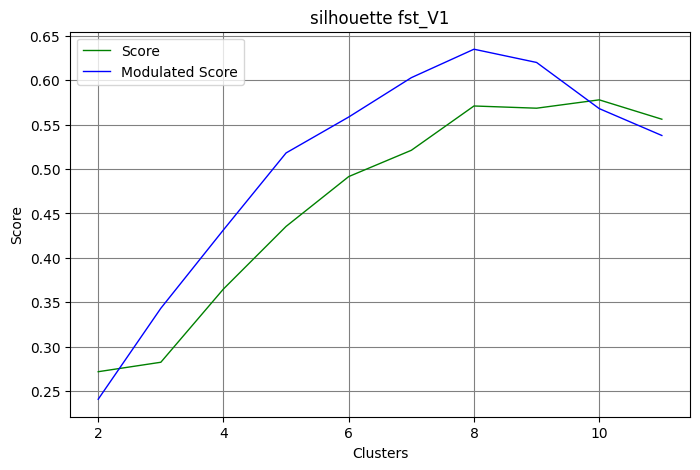

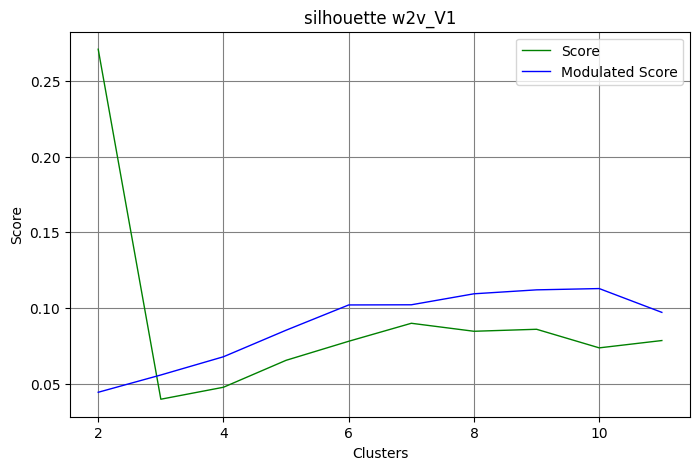

In [9]:
grafica(fst_list,fst_mod_list,"silhouette fst_V1")
grafica(w2v_list,w2v_mod_list,"silhouette w2v_V1")

In [10]:
# pca = PCA(n_components=3)

# #Los guardamos
# principalComponents_fst = pca.fit_transform(fst)
# principalDf_fst = pd.DataFrame(data = principalComponents_fst
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_fst_mod = pca.fit_transform(fst_mod)
# principalDf_fst_mod = pd.DataFrame(data = principalComponents_fst_mod
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_w2v = pca.fit_transform(w2v)
# principalDf_w2v = pd.DataFrame(data = principalComponents_w2v
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_w2v_mod = pca.fit_transform(w2v_mod)
# principalDf_w2v_mod = pd.DataFrame(data = principalComponents_w2v_mod
#              , columns = ['pc1', 'pc2','pc3'])

# print("PCA- 3 Componentes principales")
# # silhoutteDF(principalDf_fst,"fst")
# # silhoutteDF(principalDf_fst_mod,"fst modulado")
# # silhoutteDF(principalDf_w2v,"w2v")
# # silhoutteDF(principalDf_w2v_mod,"w2v modulado")
# PCA3_fst_NMI_list=NMI(principalDf_fst,"fst")
# PCA3_fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
# PCA3_w2v_NMI_list=NMI(df_w2v,"w2v")
# PCA3_w2v_mod_NMI_list=NMI(df_w2v_mod)
# grafica(principalComponents_fst,principalComponents_fst,"NMI fst")

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import normalized_mutual_info_score





def NMI(D,str="Nombre del este"):
    # Convertir etiquetas categóricas a numéricas
    listaNMI=[]
    D_clean=D.iloc[:,:100]
    for i in range(10):
        num=i+2
        #Convertir las etiquetas de emociones a int
        le = LabelEncoder()
        D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101])

        #El clustering
        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D_clean)
        y_clusters = clustering.predict(D_clean)
        #Sacamos las etiquetas conocidas del dataframe
        knownLabels=D.iloc[:,100:101].values.ravel()
        # Calcular NMI
        nmi_score = normalized_mutual_info_score(knownLabels, y_clusters)
        listaNMI.append(nmi_score)
        # print("Clusters: ",num)
        # print("Normalized Mutual Information (NMI):", nmi_score)
    return listaNMI


In [12]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

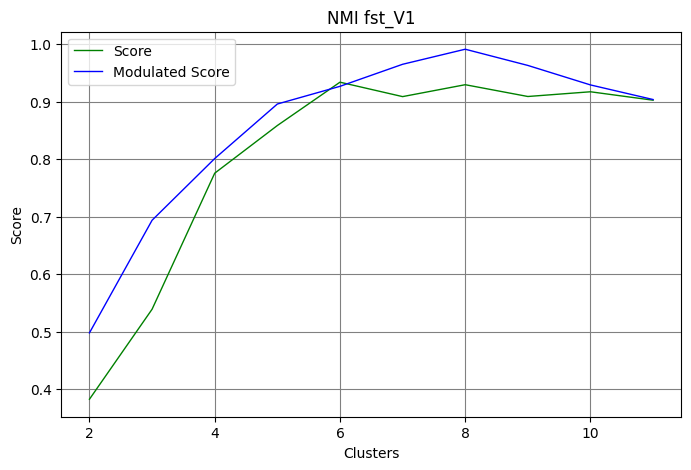

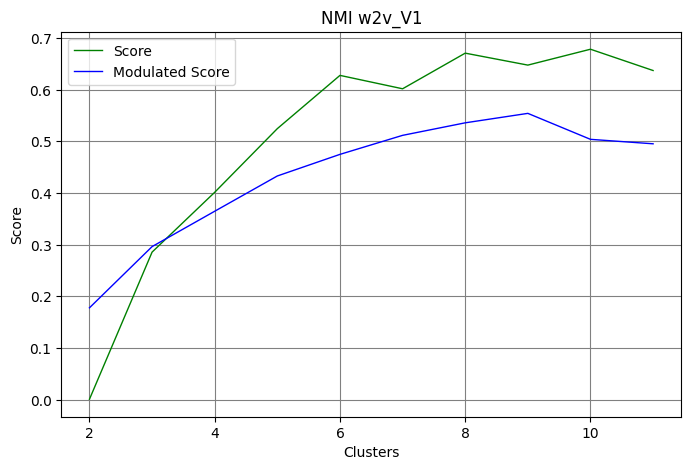

In [13]:
grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst_V1")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v_V1")

/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

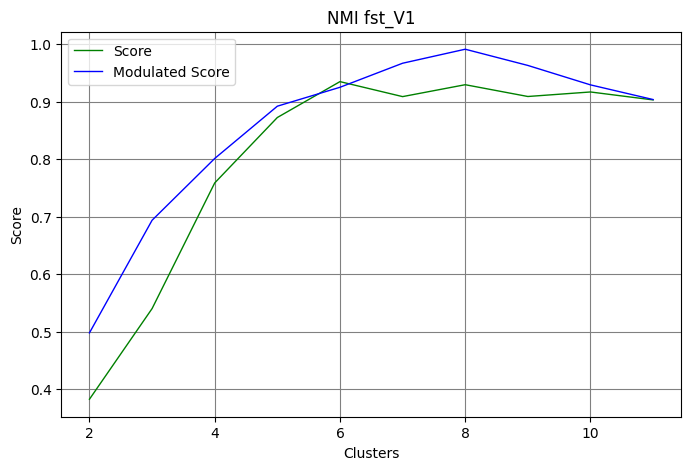

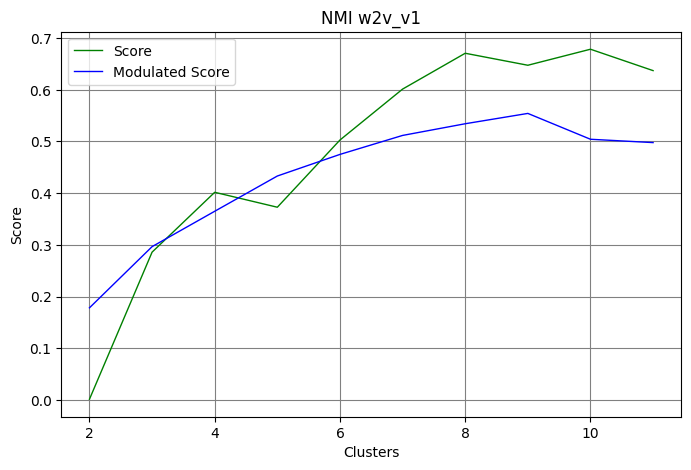

In [14]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)

grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst_V1")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v_v1")